# Proyecto Final
## Minería de Datos con Python
### Camilo González - Danna Silva

Se analizará una encuesta a estudiantes chilenos que están cursando actividades curriculares con metodología de aprendizaje servicio. Siendo el objetivo saber cómo impacta en el propósito de vida de los alumnos dicho método.

En este proyecto final se trabajará utilizando solo funciones, desde la lectura y tratamiento de datos hasta las metodologías utilizadas, estas son, la análisis de componentes principales, regresión logística y k-modes.

Para comenzar, cargaremos las librerías a utilizar en el proyecto.

#### Librerías

In [ ]:
!pip install kmodes

In [ ]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from kmodes.kmodes import KModes
from sklearn import preprocessing

#### Lectura de Base de Datos y Limpieza de Datos

El porcentaje de NA de cada columna es inferior al $5\%$ por lo que se imputará por la moda. 

Se define una función de lectura de datos.

In [ ]:
def lectura(ruta):
    data = pd.read_excel(ruta)
    return(data)

In [ ]:
data_vieja = lectura('./Base_Proyecto.xlsx')

Vemos las primeras filas de la base a trabajar.

In [ ]:
pd.options.display.max_columns = None
data_vieja.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds,Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,ST1.1.2_First_Click,ST1.1.2_Last_Click,ST1.1.2_Page_Submit,ST1.1.2_Click_Count,ST1.1.4,ST1.1.5_First_Click,ST1.1.5_Last_Click,ST1.1.5_Page_Submit,ST1.1.5_Click_Count,ST1.2.2,ID,ST1.3.2_2,ST1.3.2_3,ST1.3.2_4,ST1.3.2_5,ST1.3.2_6,ST1.3.3,ST1.3.4_First_Click,ST1.3.4_Last_Click,ST1.3.4_Page_Submit,ST1.3.4_Click_Count,ST1.4.4,ST1.4.5,ST1.4.7_First_Click,ST1.4.7_Last_Click,ST1.4.7_Page_Submit,ST1.4.7_Click_Count,T1.7a,T1.7b,T1.7c,T1.7d,T1.7e,T1.7f,T1.7g,T1.7h,ST1.4.11,T1.9c,ST1.4.16_First_Click,ST1.4.16_Last_Click,ST1.4.16_Page_Submit,ST1.4.16_Click_Count,T1.10a,T1.10b,T1.10c,T1.10d,T1.10e,T1.10f,T1.10g,T1.10h,T1.10i,T1.10j,T1.10k,T1.10l,T1.10m,T1.10n,T1.10o,T1.10p,T1.10q,T1.10r,T1.10s,T1.10t,T1.10u,T1.10v,T1.10w,T1.10x,T1.10y,T1.10z,ST1.4.19_First_Click,ST1.4.19_Last_Click,ST1.4.19_Page_Submit,ST1.4.19_Click_Count,T1.11a,T1.11b,T1.11c,T1.11d,T1.11e,T1.11f,T1.11g,T1.11h,T1.11i,T1.11j,T1.11k,T1.11l,T1.11m,T1.11n,T1.11o,T1.11p,T1.11q,T1.11r,T1.11s,T1.11t,T1.11u,T1.11v,T1.11w,T1.11x,T1.11y,T1.11z,ST1.4.22_First_Click,ST1.4.22_Last_Click,ST1.4.22_Page_Submit,ST1.4.22_Click_Count,T1.12a,T1.12b,T1.12c,T1.12d,T1.12e,T1.12f,T1.12g,T1.12h,T1.12i,T1.12j,ST1.4.25_First_Click,ST1.4.25_Last_Click,ST1.4.25_Page_Submit,ST1.4.25_Click_Count,ST1.4.30,ST1.4.31,ST1.4.32,ST1.4.33,ST1.4.34,ST1.4.35_First_Click,ST1.4.35_Last_Click,ST1.4.35_Page_Submit,ST1.4.35_Click_Count,T1.19a,T1.19b,T1.19c,T1.19d,T1.19e,T1.19f,T1.19g,T1.19h,T1.19i,T1.19j,T1.19k,T1.19l,T1.19m,T1.19n,T1.19o,T1.19p,T1.19q,ST1.4.38_First_Click,ST1.4.38_Last_Click,ST1.4.38_Page_Submit,ST1.4.38_Click_Count,ST1.4.40,ST1.4.40_8_TEXT,ST1.4.42_First_Click,ST1.4.42_Last_Click,ST1.4.42_Page_Submit,ST1.4.42_Click_Count,ST1.4.44,ST1.4.45,ST1.4.45_6_TEXT,ST1.4.47_First_Click,ST1.4.47_Last_Click,ST1.4.47_Page_Submit,ST1.4.47_Click_Count,ST1.4.54,ST1.4.55,ST1.4.57,ST1.4.58,ST1.4.59,ST1.4.61_First_Click,ST1.4.61_Last_Click,ST1.4.61_Page_Submit,ST1.4.61_Click_Count,ST1.4.63,ST1.4.67,ST1.4.69,ST1.4.70,ST1.4.71,ST1.4.71_9_TEXT,ST1.4.73,ST1.4.74_First_Click,ST1.4.74_Last_Click,ST1.4.74_Page_Submit,ST1.4.74_Click_Count,StartDate_A,EndDate_A,Status_A,IPAddress_A,Progress_A,Duration__in_seconds_A,Finished_A,RecordedDate_A,ResponseId_A,RecipientLastName_A,RecipientFirstName_A,RecipientEmail_A,ExternalReference_A,LocationLatitude_A,LocationLongitude_A,DistributionChannel_A,UserLanguage_A,ST2.1.2_First_Click,ST2.1.2_Last_Click,ST2.1.2_Page_Submit,ST2.1.2_Click_Count,ID_A,ST2.1.3_2,ST2.2.3,ST2.2.4,ST2.2.5,ST2.2.16,ST2.2.17_4,ST2.2.17_5,ST2.2.17_6,ST2.2.17_7,ST2.2.17_8,ST2.2.17_8_TEXT,ST2.2.18,ST2.2.18_8_TEXT,ST2.2.20,ST2.2.21,ST2.2.24,ST2.2.25_4,ST2.2.25_5,ST2.2.25_6,ST2.2.25_7,ST2.2.25_8,ST2.2.25_9,ST2.2.25_9_TEXT,ST2.2.27,ST2.2.28,ST2.2.36,ST2.2.36_9_TEXT,ST2.2.37,ST2.2.38,ST2.2.39,T2.22a,T2.22b,T2.22c,T2.22d,T2.22e,T2.22f,T2.22g,T2.22h,T2.22i,T2.22j,T2.22k,T2.22I.0,T1.10a_A,T1.10b_A,T1.10c_A,T1.10d_A,T1.10e_A,T1.10f_A,T1.10g_A,T1.10h_A,T1.10i_A,T1.10j_A,T1.10k_A,T1.10l_A,T1.10m_A,T1.10n_A,T1.10o_A,T1.10p_A,T1.10q_A,T1.10r_A,T1.10s_A,T1.10t_A,T1.10u_A,T1.10v_A,T1.10w_A,T1.10x_A,T1.10y_A,T1.10z_A,ST2.2.54,StartDate_B,EndDate_B,Status_B,IPAddress_B,Progress_B,Duration__in_seconds_B,Finished_B,RecordedDate_B,ResponseId_B,RecipientLastName_B,RecipientFirstName_B,RecipientEmail_B,ExternalReference_B,LocationLatitude_B,LocationLongitude_B,DistributionChannel_B,UserLanguage_B,ST3.1.4_First_Click,ST3.1.4_Last_Click,ST3.1.4_Page_Submit,ST3.1.4_Click_Count,Q90,ID_B,ST3.1.3_2,Q92_3,Q94,Q83,Q87,Q88,Q84,Q86,Q96,Q98,Q102,Q104,Q106,Q106_9_TEXT,Q108,ST3.2.2,T3.2a,T3.2b,T3.2c,T3.2d,T3.2e,T3.2f,T3.2g,T3.2h,T3.2I,T3.2j,T3.2k,T3.2l,T3.2m,T3.2n,T3.2o,T3.2p,T3.2q,T3.2r,T3.2s,T3.2t,T3.2u,T3.2v,T3.2w,T3.2x,T3.2y,T3.2z,ST3.2.5_3,ST3.2.5_4,ST3.2.5_5,ST3.2.8,T3.6a,T3.6b,T3.6c,T3.6d,T3.6e,T3.6f,T3.6g,T3.6h,

Se puede observar que se encuentran variables como el IP desde dónde respondieron, el inicio o término de la hoja a responder, cuánto se demoran, preguntas abiertas, variables de principio y del desarrollo de la experiencia de aprendizaje servicio, etc. 

Debido a que solo utilizaremos variables de la última encuesta (T3), realizaremos un análisis descriptivos univariado para observar cómo se comporta la muestra al terminar su experiencia de aprendizaje servicio.

## Gráficos univariados

### Gráficos de densidad

Para observar cómo se comportan los datos numéricos, realizaremos gráficos de densidad para la variable edad y  horas de servicio a la comunidad.
Cabe destacar que no fueron necesario hacer transformaciones, porque las variables no tenían una asimetría significativa.

Text(0.5, 1.0, 'Edad')

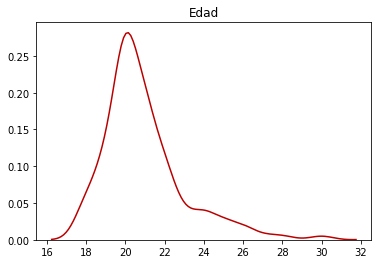

In [ ]:
sns.kdeplot(data = data_vieja['ST1.3.2_3'],
            legend = False,
           shade = False,
           vertical = False,
           kernel = 'gau', 
           cumulative = False, 
           color = "#BB0000")
plt.title('Edad')

Se observa en el gráfico de densidad que la edad de estudiantes encuestados tiene un rango de 18 a 30 años, concentrándose en la edad de 20 años.

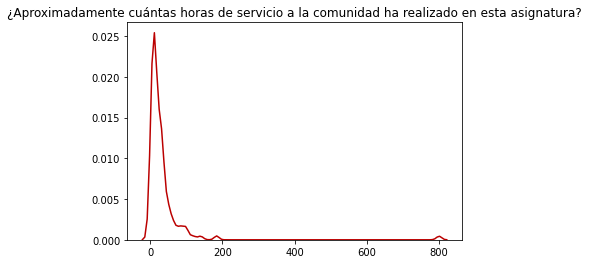

In [ ]:
sns.kdeplot(data = data_vieja['ST3.2.2'],
            legend = False,
           shade = False,
           vertical = False,
           kernel = 'gau', 
           cumulative = False, 
           color = "#BB0000")
plt.title('¿Aproximadamente cuántas horas de servicio a la comunidad ha realizado en esta asignatura?')
plt.show()

En el gráfico anterior, observamos las horas que estudiantes declaran haber invertido en servicio a la comunidad. 
Existen dos estudiantes que mencionan altas horas destinadas a la actividad de aprendizaje servicio. Sin embargo, el resto de estudiantes se concentran en los valores más bajo. 

### Histogramas

Para observar cómo se comportan los datos categóricos, realizaremos histogramas para las siguientes variables: 

1) Género

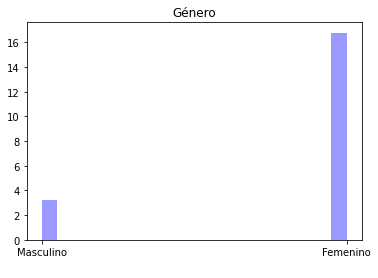

In [ ]:
xlabels = ['Masculino', 'Femenino']
sns.distplot(a = data_vieja['Q102'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.title("Género")
plt.xticks(range(0,2),xlabels,rotation=0)
plt.xlabel(' ')
plt.show()

Se observa en el gráfico que la mayoría de encuestados son de género femenino.


2) Antes de este semestre, ¿Había participado en algún proyecto previo de aprendizaje+servicio?

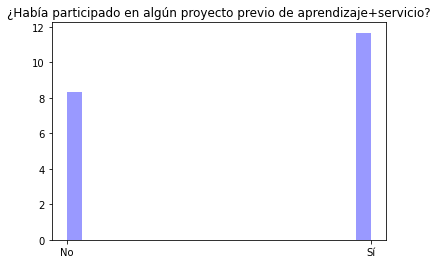

In [ ]:
xlabels = ['No', 'Sí']
sns.distplot(a = data_vieja['Q96'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.title("¿Había participado en algún proyecto previo de aprendizaje+servicio?")
plt.xticks(range(0,2),xlabels,rotation=0)
plt.xlabel(' ')
plt.show()

Se puede observar en el gráfico que gran parte de la muestra ya había pasado por una experiencia de aprendizaje servicio antes de la actividad curricular actual. En otras palabras, ya contaban con experiencia previa.

3) En los cinco años anteriores, ¿Ha realizado algún servicio voluntario fuera de la escuela/universidad?

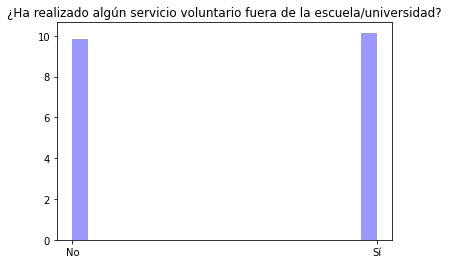

In [ ]:
xlabels = ['No', 'Sí']
sns.distplot(a = data_vieja['Q98'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,2),xlabels,rotation=0)
plt.title("¿Ha realizado algún servicio voluntario fuera de la escuela/universidad?")
plt.xlabel(' ')
plt.show()

Siguiendo con la experiencia previa que han tenido los estudiantes, se puede observar en el gráfico que existen más personas que han participado en voluntariados antes. Sin embargo, la diferencia no es tan pronunciada como la anterior.

4) ¿Le gustaría continuar participando en este tipo de proyectos de aprendizaje+servicio después de este curso?

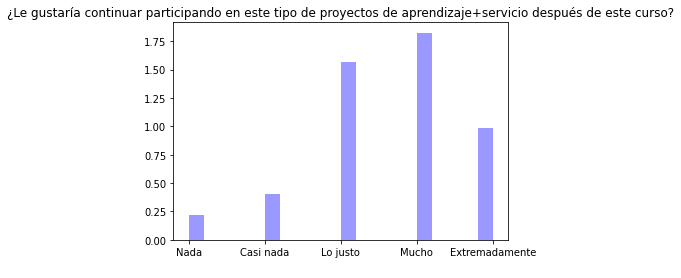

In [ ]:
xlabels = ['Nada', 'Casi nada', 'Lo justo', 'Mucho', 'Extremadamente']
sns.distplot(a = data_vieja['ST3.2.8'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(1,6),xlabels,rotation=0)
plt.title("¿Le gustaría continuar participando en este tipo de proyectos de aprendizaje+servicio después de este curso?")
plt.xlabel(' ')
plt.show()

Después de terminar el proyecto de aprendizaje servicio en la actividad curricular correspondiente, los estudiantes expresan que les gustaría seguir participando "mucho" en este tipo de experiencias.

5) ¿Qué describe mejor sus sentimientos acerca de las tareas realizadas durante la experiencia de trabajo en la comunidad?

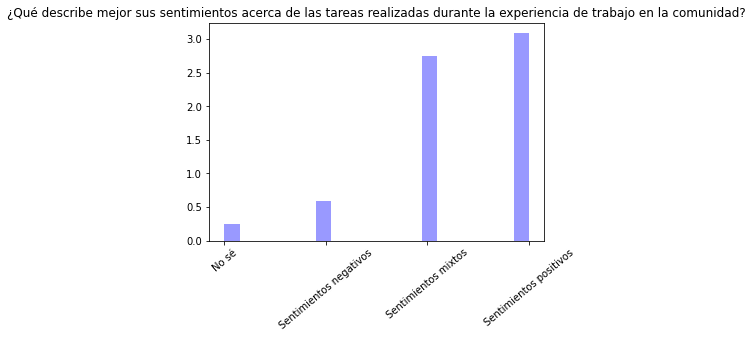

In [ ]:
xlabels = ['No sé', 'Sentimientos negativos', 'Sentimientos mixtos', 'Sentimientos positivos']
sns.distplot(a = data_vieja['ST3.2.28'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,4),xlabels,rotation=40)
plt.title("¿Qué describe mejor sus sentimientos acerca de las tareas realizadas durante la experiencia de trabajo en la comunidad?")
plt.xlabel(' ')
plt.show()

El mayor porcentaje de estudiantes menciona que tuvieron sentimientos positivos por las tareas realizadas durante el proyecto de aprendizaje servicio. Luego, expresan que tienen una mezcla de sentimientos positivos y negativos.
Siendo que en su minoría no saben qué sintieron con respecto a las tareas desempeñadas durante el semestre para los socios comunitarios.

6) ¿Qué describe mejor sus sentimientos sobre su rol  durante la experiencia de aprendizaje+servicio?

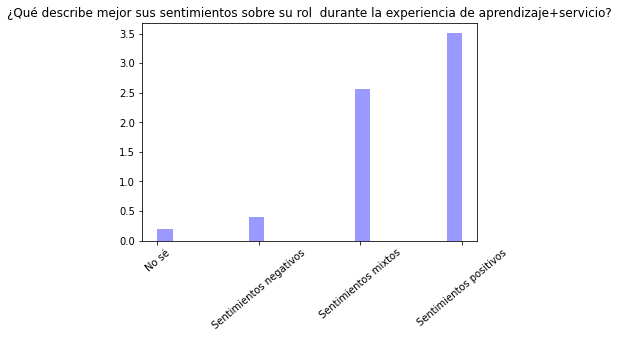

In [ ]:
xlabels = ['No sé', 'Sentimientos negativos', 'Sentimientos mixtos', 'Sentimientos positivos']
sns.distplot(a = data_vieja['ST3.2.34'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,4),xlabels,rotation=40)
plt.title("¿Qué describe mejor sus sentimientos sobre su rol  durante la experiencia de aprendizaje+servicio?")
plt.xlabel(' ')
plt.show()

Con respecto a los sentimientos que tuvieron del rol que desempeñaron durante el semestre (lider, seguidor, etc), en su mayoría siguen mencionando que sostuvieron sentimientos positivos. También podemos apreciar que disminuyen las demás opciones con respecto a los sentimientos por las tareas.

7) ¿Qué opción describe mejor sus sentimientos sobre las interacciones con la comunidad?

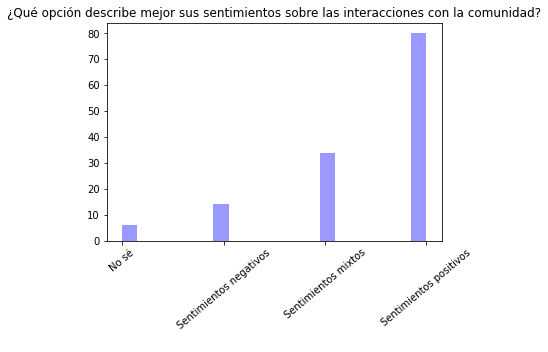

In [ ]:
xlabels = ['No sé', 'Sentimientos negativos', 'Sentimientos mixtos',
           'Sentimientos positivos']
sns.distplot(a = data_vieja['ST3.2.45'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = False) 
plt.xticks(range(0,4),xlabels,rotation=40)
plt.title("¿Qué opción describe mejor sus sentimientos sobre las interacciones con la comunidad?")
plt.xlabel(' ')
plt.show()

Los sentimientos que tuvieron los estudiantes con respecto a las interacciones con la comunidad, fueron positivos.

Como conclusión de cómo se sintieron los estudiantes, podemos apreciar que con respecto a las interacciones tuvieron más claro que sus sentimientos fueron positivos. En cambio, cuando mencionan los roles y tareas en la comunidad, tienden a elegir también mezclas entre sentimientos negativos y positivos.

8) ¿Cuál de las siguientes opciones describe mejor sus interacciones con las personas o entidades a las que se pretendió ayudar en su experiencia?


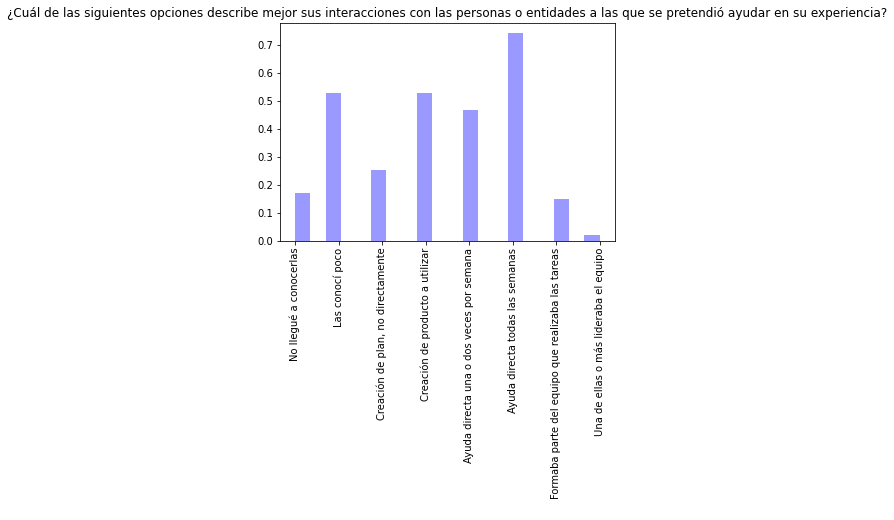

In [ ]:
xlabels = ['No llegué a conocerlas', 'Las conocí poco',
           'Creación de plan, no directamente', 'Creación de producto a utilizar',
           'Ayuda directa una o dos veces por semana', 'Ayuda directa todas las semanas',
           'Formaba parte del equipo que realizaba las tareas',
           'Una de ellas o más lideraba el equipo']
sns.distplot(a = data_vieja['ST3.2.43'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,8),xlabels,rotation=90)
plt.title("¿Cuál de las siguientes opciones describe mejor sus interacciones con las personas o entidades a las que se pretendió ayudar en su experiencia?")
plt.xlabel(' ')
plt.show()

Los estudiantes declaran que, en su mayoría, brindaron ayuda directa prácticamente todas las semanas o sesiones que duró el proyecto de aprendizaje servicio.
Luego, mencionan en un menor porcentaje que conocieron poco a su socio comunitario o crearon un producto o prototipo para que lo utilicen.

9) ¿Cómo le ayudaron estas interacciones?

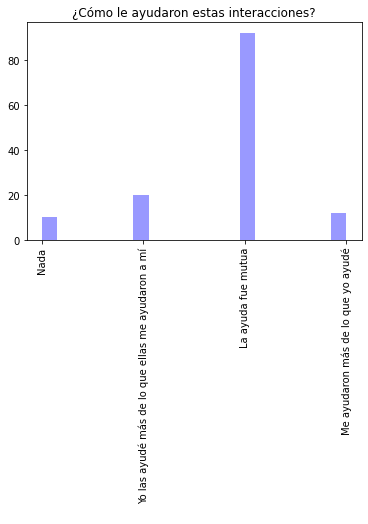

In [ ]:
xlabels = ['Nada', 'Yo las ayudé más de lo que ellas me ayudaron a mí',
           'La ayuda fue mutua', 'Me ayudaron más de lo que yo ayudé']
sns.distplot(a = data_vieja['ST3.2.44'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = False) 
plt.xticks(range(0,4),xlabels,rotation=90)
plt.title("¿Cómo le ayudaron estas interacciones?")
plt.xlabel(' ')
plt.show()

A continuación, los estudiantes expresan cómo ayudo a algún miembro de esta experiencia, las interacciones que tuvieron. 

La mayoría de los encuestados mencionan que la ayuda con la comunidad fue mutua, mientras que un menor porcentaje declara que no se ayudó con el proyecto relacionado a su actividad curricular.

10) ¿Qué característica hizo que esta experiencia de A+S  sea la que más influencia tuvo en usted?

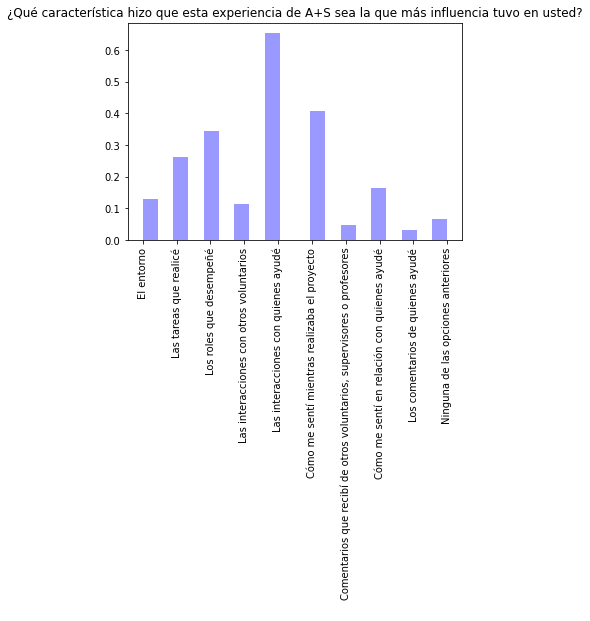

In [ ]:
xlabels = ['El entorno', 'Las tareas que realicé', 'Los roles que desempeñé',
           'Las interacciones con otros voluntarios', 'Las interacciones con quienes ayudé',
           'Cómo me sentí mientras realizaba el proyecto', 
           'Comentarios que recibí de otros voluntarios, supervisores o profesores',
           'Cómo me sentí en relación con quienes ayudé',
           'Los comentarios de quienes ayudé', 'Ninguna de las opciones anteriores']
sns.distplot(a = data_vieja['ST3.2.56'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(1,11),xlabels,rotation=90)
plt.title("¿Qué característica hizo que esta experiencia de A+S sea la que más influencia tuvo en usted?")
plt.xlabel(' ')
plt.show()

Lo que más respondieron los encuestados fue "las interacciones con aquellas personas a quien ayudé", por lo que volvemos a notar una fuerte influencia en las interacciones que tienen los participantes con la comunidad.

11) Cuando doy ayuda, me concentro en lo que puedo lograr...

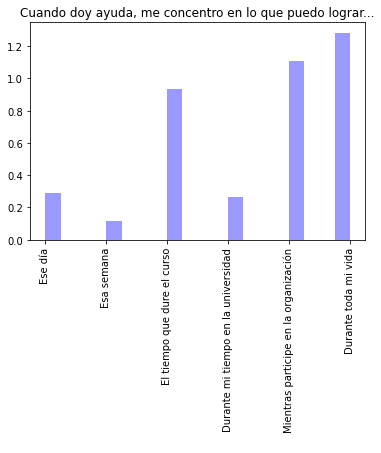

In [ ]:
xlabels = ['Ese día', 'Esa semana', 'El tiempo que dure el curso',
           'Durante mi tiempo en la universidad',
           'Mientras participe en la organización', 'Durante toda mi vida']
sns.distplot(a = data_vieja['ST3.2.64'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(1,7),xlabels,rotation=90)
plt.title("Cuando doy ayuda, me concentro en lo que puedo lograr...")
plt.xlabel(' ')
plt.show()

Los estudiantes mencionan en su mayoría que cuando dan ayudan se concentran en lo que pueden lograr durante toda su vida. Luego, mencionan que se concentran mientras participen en el trabajo u organización, y el tiempo que dure el curso.

12) Suelo abandonar las actividades cuando provocan en otras personas lo siguiente:

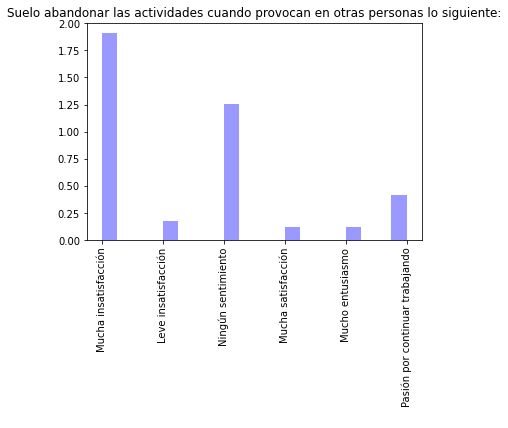

In [ ]:
xlabels = ['Mucha insatisfacción', 'Leve insatisfacción', 'Ningún sentimiento',
           'Mucha satisfacción', 'Mucho entusiasmo', 'Pasión por continuar trabajando']
sns.distplot(a = data_vieja['ST3.2.65'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(1,7),xlabels,rotation=90)
plt.title("Suelo abandonar las actividades cuando provocan en otras personas lo siguiente:")
plt.xlabel(' ')
plt.show()

La mayoría de los participantes en las encuestas, mencionan que suelen abandonar actividades cuando provocan mucha insatisfacción en otras personas. Luego, expresan que provocar ningún sentimiento es motivo para dejar sus actividades.

13) Cuando participo en actividades de ayuda a otras personas, me concentro en:

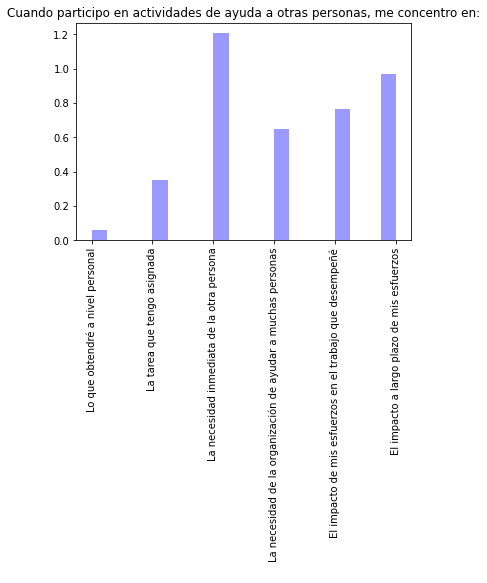

In [ ]:
xlabels = ['Lo que obtendré a nivel personal', 'La tarea que tengo asignada',
           'La necesidad inmediata de la otra persona',
           'La necesidad de la organización de ayudar a muchas personas',
           'El impacto de mis esfuerzos en el trabajo que desempeñé',
           'El impacto a largo plazo de mis esfuerzos']
sns.distplot(a = data_vieja['ST3.2.67'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(1,7),xlabels,rotation=90)
plt.title("Cuando participo en actividades de ayuda a otras personas, me concentro en:")
plt.xlabel(' ')
plt.show()

Gran parte de los estudiantes menciona que se concentra en la necesidad inmediata de la otra persona cuando participa en actividades de esta índole. 
Un porcentaje levemente menor, manifiesta que se concentra en el impacto a largo plazo de sus esfuerzos.

14) Participar en la ayuda a otras personas define quién soy:

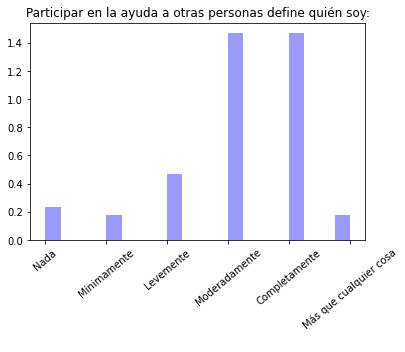

In [ ]:
xlabels = ['Nada', 'Mínimamente', 'Levemente', 'Moderadamente',
           'Completamente', 'Más que cualquier cosa']
sns.distplot(a = data_vieja['ST3.2.68'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,6),xlabels,rotation=40)
plt.title("Participar en la ayuda a otras personas define quién soy:")
plt.xlabel(' ')
plt.show()

Los estudiantes declaran que moderadamente y completamente participar en la ayuda a otras personas definen quienes son.

15) El proyecto de aprendizaje+servicio que realicé durante el semestre en esta asignatura:

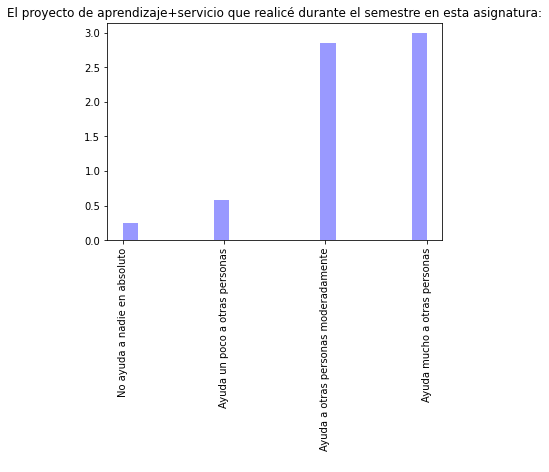

In [ ]:
xlabels = ['No ayuda a nadie en absoluto', 'Ayuda un poco a otras personas',
           'Ayuda a otras personas moderadamente',
           'Ayuda mucho a otras personas']
sns.distplot(a = data_vieja['ST3.2.69'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,4),xlabels,rotation=90)
plt.title("El proyecto de aprendizaje+servicio que realicé durante el semestre en esta asignatura:")
plt.xlabel(' ')
plt.show()

Los estudiantes mencionan en primer lugar que el proyecto que realizaron en la actividad curricular ayuda mucho a otras personas. En segundo lugar, con menos fuerza, consideran que la experiencia vivida ayuda a otras personas moderadamente.

16) Realizar este proyecto de aprendizaje+servicio cambió el rumbo a mi vida:

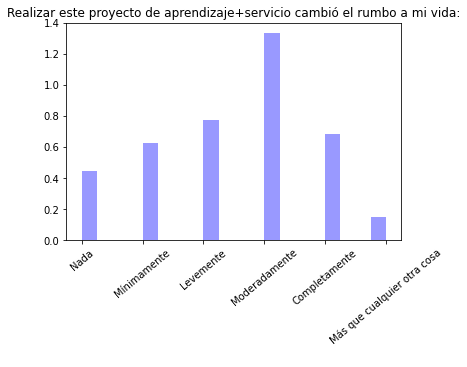

In [ ]:
xlabels = ['Nada', 'Mínimamente', 'Levemente', 'Moderadamente', 'Completamente',
           'Más que cualquier otra cosa']
sns.distplot(a = data_vieja['ST3.2.70'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,6),xlabels,rotation=40)
plt.title("Realizar este proyecto de aprendizaje+servicio cambió el rumbo a mi vida:")
plt.xlabel(' ')
plt.show()

Los estudiantes declaran que el proyecto cambió moderadamente el rumbo de su vida.

En las siguiente opciones varian su cantidad de respuestas, es por esto que se realizan preguntas intencionadas a profundizar esto.

17) ¿Considera que su experiencia en esta asignatura está relacionada con su propósito de vida?

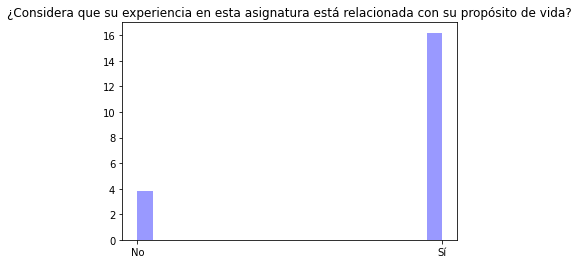

In [ ]:
xlabels = ['No', 'Sí']
sns.distplot(a = data_vieja['ST3.2.82'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,2),xlabels,rotation=0)
plt.title("¿Considera que su experiencia en esta asignatura está relacionada con su propósito de vida?")
plt.xlabel(' ')
plt.show()

Es notorio el cambio en esta pregunta, debido a que gran parte de los encuestados consideran que su propósito de vida está relacionado con el proyecto de aprendizaje servicio realizado en la actividad curricular.

18) ¿Su propósito de vida ha cambiado como consecuencia de las experiencias que usted vivió este semestre?

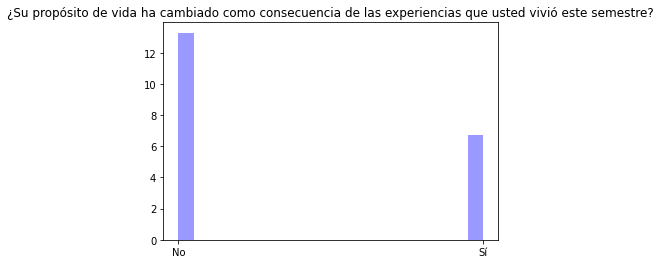

In [ ]:
xlabels = ['No', 'Sí']
sns.distplot(a = data_vieja['ST3.2.89'],
            bins = 20, 
            hist = True, 
            kde = False, 
            rug = False, 
            color = "blue",
            vertical = False,
            norm_hist = True) 
plt.xticks(range(0,2),xlabels,rotation=0)
plt.title("¿Su propósito de vida ha cambiado como consecuencia de las experiencias que usted vivió este semestre?")
plt.xlabel(' ')
plt.show()

Pese a que existe un alto número de personas que aluden a que la actividad curricular estaba relacionada con su propósito de vida, la mayoría indica que luego de terminar con la experiencia de aprendizaje servicio no cambió su propósito como una consecuencia.

## Definición de Bases de preguntas con Escala Likert para PCA

Se arma una lista donde cada elemento corresponde a un dataframe de las preguntas con escala Likert.

Las variables con escala Likert son las siguientes:
- T3.2
- T3.6
- T2.22_A
- T3.43
- T3.44
- ST3.2.32



In [ ]:
display(np.where(data_vieja.columns.values == 'T3.2a'))
display(np.where(data_vieja.columns.values == 'T3.2z'))
display(np.where(data_vieja.columns.values == 'T3.6a'))
display(np.where(data_vieja.columns.values == 'T3.6h'))
display(np.where(data_vieja.columns.values == 'T2.22a_A'))
display(np.where(data_vieja.columns.values == 'T3.43a'))
display(np.where(data_vieja.columns.values == 'T3.44a'))
display(np.where(data_vieja.columns.values == 'T3.44z'))

(array([325]),)

(array([350]),)

(array([355]),)

(array([362]),)

(array([391]),)

(array([428]),)

(array([438]),)

(array([463]),)

In [ ]:
def data_likert(data_vieja):
    T32 = data_vieja.iloc[:,325:351].astype('category')
    T36 = data_vieja.iloc[:,355:363].astype('category')
    T222_A = data_vieja.iloc[:,391:403].astype('category')
    T343 = data_vieja.iloc[:,428:438].astype('category')
    T344 = data_vieja.iloc[:,438:464].astype('category')
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    imputer=imputer.fit(T32)
    T32=pd.DataFrame(imputer.transform(T32))
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    imputer=imputer.fit(T36)
    T36=pd.DataFrame(imputer.transform(T36))
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    imputer=imputer.fit(T222_A)
    T222_A=pd.DataFrame(imputer.transform(T222_A))
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    imputer=imputer.fit(T343)
    T343=pd.DataFrame(imputer.transform(T343))
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    imputer=imputer.fit(T344)
    T344=pd.DataFrame(imputer.transform(T344))
    lista_aux = [T32, T36, T222_A, T343, T344]
    return lista_aux

In [ ]:
lista_likert = data_likert(data_vieja)

## Análisis de componentes principales


Se realiza un análisis de componentes principales para reducir las variables, esto es porque hay preguntas con escala likert hasta con 20 variables asociadas.

In [ ]:
def variables_pca(lista_df):
    
    X=lista_df[0]
    pca = PCA()
    pc = pca.fit(X)
    pca_T32 = pd.DataFrame(pc.transform(X)[:, 0:10]) #10 componentes
    pca_T32.columns = ['pca_T32_c0', 'pca_T32_c1' ,'pca_T32_c2', 'pca_T32_c3', 'pca_T32_c4', 'pca_T32_c5', 'pca_T32_c6', 'pca_T32_c7' ,'pca_T32_c8', 'pca_T32_c9']
    pesos_T32 = pc.components_
    
    X=lista_df[1]
    pca = PCA()
    pc = pca.fit(X)
    pca_T36 = pd.DataFrame(pc.transform(X)[:, 0:4]) #4 componentes
    pca_T36.columns = ['pca_T36_c0', 'pca_T36_c1', 'pca_T36_c2', 'pca_T36_c3']
    pesos_T36 = pc.components_
        
    X=lista_df[2]
    pca = PCA()
    pc = pca.fit(X)
    pca_T222_A = pd.DataFrame(pc.transform(X)[:, 0:7]) #7 componentes
    pca_T222_A.columns = ['pca_T222_A_c0', 'pca_T222_A_c1','pca_T222_A_c2','pca_T222_A_c3','pca_T222_A_c4', 'pca_T222_A_c5',  'pca_T222_A_c6']
    pesos_T222_A = pc.components_

        
    X=lista_df[3]
    pca = PCA()
    pc = pca.fit(X)
    pca_T343 = pd.DataFrame(pc.transform(X)[:, 0:6]) #6 componentes
    pca_T343.columns = ['pca_T343_c0', 'pca_T343_c1','pca_T343_c2','pca_T343_c3', 'pca_T343_c4', 'pca_T343_c5' ]
    pesos_T343 = pc.components_
    
    X=lista_df[4]
    pca = PCA()
    pc = pca.fit(X)
    pca_T344 = pd.DataFrame(pc.transform(X)[:, 0:11]) #11 componentes
    pca_T344.columns = ['pca_T344_c0', 'pca_T344_c1','pca_T344_c2','pca_T344_c3','pca_T344_c4', 'pca_T344_c5', 'pca_T344_c6', 'pca_T344_c7', 'pca_T344_c8', 'pca_T344_c9', 'pca_T344_c10']
    pesos_T344 = pc.components_

    lista_pesos = [ pesos_T32, pesos_T36, pesos_T222_A, pesos_T343, pesos_T344]
    
    list_aux2 = [pca_T32, pca_T36, pca_T222_A, pca_T343, pca_T344, lista_pesos]
    
    return(list_aux2)

In [ ]:
componentes = variables_pca(lista_likert)

## Regresión Logística

### Se optimiza con shrinkage para obtener las variables a utilizar

El método consiste en agregar una restricción a la función a optimizar, es decir,

$$\text{argmax}_\beta( \sum_{i=1}^n [y_i(\beta^T x_i)- \log(1+e^{\beta^T x_i})]- \lambda\sum_{j=1}^p |\beta_j| )$$
donde el parámetro $\lambda$ es el penalizador.

Se define una función que arma una nueva base que no incluye variables no pertinentes, por ejemplo, hora de la encuesta, ip, duración, etc. A esta base se le agregan las variables que se van a generar por Componentes Principales por medio de preguntas con escala likert. 

In [ ]:
def base_nueva(data_vieja):
    data_nueva = pd.DataFrame({
        'respuesta' : data_vieja['ST3.2.89'],
        'sexo' : data_vieja['Q102'],
        'edad' : data_vieja['ST1.3.2_3'],
        'Q96' : data_vieja['Q96'],
        'Q98' : data_vieja['Q98'],
        'ST322' : data_vieja['ST3.2.2'],
        'ST328' : data_vieja['ST3.2.8'],
        'ST3228' : data_vieja['ST3.2.28'],
        'ST3234' : data_vieja['ST3.2.34'],
        'ST3243' : data_vieja['ST3.2.43'],
        'ST3244' : data_vieja['ST3.2.44'],
        'ST3245' : data_vieja['ST3.2.45'],
        'ST3256' : data_vieja['ST3.2.56'],
        'ST3264' : data_vieja['ST3.2.64'],
        'ST3265' : data_vieja['ST3.2.65'],
        'ST3267' : data_vieja['ST3.2.67'],
        'ST3268' : data_vieja['ST3.2.68'],
        'ST3269' : data_vieja['ST3.2.69'],
        'ST3270' : data_vieja['ST3.2.70'],
        'ST3282' : data_vieja['ST3.2.82'],
    })
    col_names = data_nueva.columns
    imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
    imputer=imputer.fit(data_nueva)
    data_nueva=pd.DataFrame(imputer.transform(data_nueva))
    data_nueva.columns = col_names
    return data_nueva 

In [ ]:
def base_final(data_vieja, componentes):
    data_nueva = base_nueva(data_vieja).reset_index()
    cm0 = componentes[0].reset_index()
    cm1 = componentes[1].reset_index()
    cm2 = componentes[2].reset_index()
    cm3 = componentes[3].reset_index()
    cm4 = componentes[4].reset_index()
    df_aux = pd.merge(data_nueva, cm0, on='index')
    df_aux = pd.merge(df_aux, cm1, on='index')
    df_aux = pd.merge(df_aux, cm2, on='index')
    df_aux = pd.merge(df_aux, cm3, on='index')
    df_aux = pd.merge(df_aux, cm4, on='index')
    data_final = df_aux.iloc[:,1:]
    return(data_final)

In [ ]:
data_final = base_final(data_vieja, componentes)

Se define una función que entregue el porcentaje de NA por columna, esto es solo de comprobación pues anteriormente se hizo el correcto tratamiento.

In [ ]:
def porcentaje_na(datos):
    porcentaje_na = datos.isnull().mean() * 100
    df_na = porcentaje_na.to_frame().transpose()
    return df_na

In [ ]:
porcentaje_na(data_final)

,respuesta,sexo,edad,Q96,Q98,ST322,ST328,ST3228,ST3234,ST3243,ST3244,ST3245,ST3256,ST3264,ST3265,ST3267,ST3268,ST3269,ST3270,ST3282,pca_T32_c0,pca_T32_c1,pca_T32_c2,pca_T32_c3,pca_T32_c4,pca_T32_c5,pca_T32_c6,pca_T32_c7,pca_T32_c8,pca_T32_c9,pca_T36_c0,pca_T36_c1,pca_T36_c2,pca_T36_c3,pca_T222_A_c0,pca_T222_A_c1,pca_T222_A_c2,pca_T222_A_c3,pca_T222_A_c4,pca_T222_A_c5,pca_T222_A_c6,pca_T343_c0,pca_T343_c1,pca_T343_c2,pca_T343_c3,pca_T343_c4,pca_T343_c5,pca_T344_c0,pca_T344_c1,pca_T344_c2,pca_T344_c3,pca_T344_c4,pca_T344_c5,pca_T344_c6,pca_T344_c7,pca_T344_c8,pca_T344_c9,pca_T344_c10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_final.to_csv('base_final.csv')

Se procede a aplicar la regresión logística propiamente tal.

In [ ]:
def ajuste(data_final):
    formula = "respuesta ~ "
    formula = formula + " C(sexo) + edad + C(Q96) + C(Q98) + ST322 + ST328 + ST3228 + ST3234 + ST3243 "
    formula = formula + " + ST3244 + ST3245 + ST3256 + ST3264 + ST3265 + ST3267 + ST3268 "
    formula = formula + " + ST3269 + ST3270 + C(ST3282) + pca_T32_c0 + pca_T32_c1 + pca_T32_c2 " 
    formula = formula + " + pca_T32_c3 + pca_T32_c4 + pca_T32_c5 + pca_T32_c6 + pca_T32_c7 "
    formula = formula + " + pca_T32_c8 + pca_T32_c9 + pca_T36_c0 + pca_T36_c1 + pca_T36_c2 "
    formula = formula + " + pca_T36_c3 + pca_T222_A_c0 + pca_T222_A_c1 +  pca_T222_A_c2 "
    formula = formula + " + pca_T222_A_c3 + pca_T222_A_c4 + pca_T222_A_c5 "     
    formula = formula + " + pca_T222_A_c6 + pca_T343_c0 + pca_T343_c1 + pca_T343_c2 "   
    formula = formula + " + pca_T343_c3 + pca_T343_c4 + pca_T343_c5 + pca_T344_c0 + pca_T344_c1 "   
    formula = formula + " + pca_T344_c2 + pca_T344_c3 + pca_T344_c4 + pca_T344_c5 + pca_T344_c6 "    
    formula = formula + " + pca_T344_c7 + pca_T344_c8 + pca_T344_c9 + pca_T344_c10 "
    
    logistica = smf.logit(formula = formula, data = data_final)
    logistica_fit = logistica.fit_regularized(method = 'l1', alpha = 1) 
    prediccion_logit = logistica_fit.predict(data_final)
    Y = data_final.iloc[:, 0]
    roc = metrics.roc_curve(Y, prediccion_logit)
    auc = metrics.auc(roc[0], roc[1])
    plt.plot(roc[0], roc[1])
    plt.plot([0,1], [0,1])  
    prediccion_logit = (prediccion_logit >= 0.42) * 1
    matriz_logit = metrics.confusion_matrix(Y, prediccion_logit)
    display(matriz_logit)
    tn, fp, fn, tp = matriz_logit.ravel()
    accuracy_logit = (tp + tn)/(tp + tn + fp + fn)
    precision_logit = tp/(tp + fp)
    recall_logit = tp/(tp + fn)
    f1_logit = ( 2 * (precision_logit * recall_logit) / (precision_logit + recall_logit) )
    print('La precision de la regresión es: ', precision_logit)
    print('El recall de la regresión es: ', recall_logit)
    print('El puntaje F1 de la regresión es: ', f1_logit)
    print('El accuracy de la regresión es: ', accuracy_logit)
    print('El AUC de la regresión es: ', auc)
    df_aux = logistica_fit.params.to_frame().transpose()
    return df_aux

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3886899316593414
            Iterations: 110
            Function evaluations: 117
            Gradient evaluations: 110


array([[83,  8],
       [ 5, 41]])

La precision de la regresión es:  0.8367346938775511
El recall de la regresión es:  0.8913043478260869
El puntaje F1 de la regresión es:  0.8631578947368421
El accuracy de la regresión es:  0.9051094890510949
El AUC de la regresión es:  0.9419493549928333


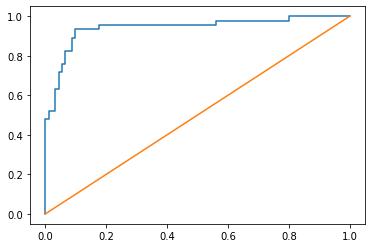

In [ ]:
parametros = ajuste(data_final)

Podemos observar que tenemos unas métricas bastante buenas, todas sobre el 80%. 
Por otro lado, destacamos el accuracy del 90% por lo que nuestro modelo tiene un alto grado de correcta clasificación permitiendo utilizar los parámetros para la intepretación de las preguntas de la encuesta.


In [ ]:
parametros

,Intercept,C(sexo)[T.1.0],C(Q96)[T.1.0],C(Q98)[T.1.0],C(ST3282)[T.1.0],edad,ST322,ST328,ST3228,ST3234,ST3243,ST3244,ST3245,ST3256,ST3264,ST3265,ST3267,ST3268,ST3269,ST3270,pca_T32_c0,pca_T32_c1,pca_T32_c2,pca_T32_c3,pca_T32_c4,pca_T32_c5,pca_T32_c6,pca_T32_c7,pca_T32_c8,pca_T32_c9,pca_T36_c0,pca_T36_c1,pca_T36_c2,pca_T36_c3,pca_T222_A_c0,pca_T222_A_c1,pca_T222_A_c2,pca_T222_A_c3,pca_T222_A_c4,pca_T222_A_c5,pca_T222_A_c6,pca_T343_c0,pca_T343_c1,pca_T343_c2,pca_T343_c3,pca_T343_c4,pca_T343_c5,pca_T344_c0,pca_T344_c1,pca_T344_c2,pca_T344_c3,pca_T344_c4,pca_T344_c5,pca_T344_c6,pca_T344_c7,pca_T344_c8,pca_T344_c9,pca_T344_c10
0,0.0,0.0,1.225983,0.0,0.0,-0.008783,-0.023798,-0.261316,0.02974,0.096136,-0.049251,0.286407,0.0,-0.351168,0.234228,0.0,-0.496046,0.066848,0.0,0.541018,-0.125278,0.048966,0.0,-0.58908,-0.184869,0.0,0.218627,-0.239526,-0.084474,-0.478364,0.185948,0.497462,0.0,0.179722,0.0,-0.141212,-0.169401,0.0,0.259941,-0.443666,-0.151805,-0.204233,-0.434391,0.067179,0.012759,0.053509,0.0,0.002755,-0.0072,0.037501,0.0,0.094722,0.166814,0.330957,0.311531,-0.256355,0.150321,0.0


### Interpretación de las razones de chance

**Sexo**

No entra al modelo.

**Q96**

***Antes de este semestre, ¿Había participado en algún proyecto previo de aprendizaje servicio?***

Tenemos que las razones de chances cambian 3.4 veces, esto quiere decir que es mucho más probable que cambie el proposito de vida para alguien que ya 
previamente habia participado.

**Q98**

***¿Ha realizado algún servicio voluntario fuera de la escuela/universidad?***

No es significativa porque el parámetro asociado a la categoría de referencia es cero al igual que el intercepto.


**Edad**

La edad tiene como parámetro el valor de -0.008783, tomando la exponencial de este valor, tenemos que cuando la edad de los estudiantes aumenta en una unidad y las demás variables se mantienen constantes, la chance de que cambie su propósito de vida aumenta en 0.99 veces. Esto nos dice que la edad no influye de manera significativa en el propósito de vida. Sin embargo, ingresa al modelo.

**ST3282**

***¿Considera que su experiencia en esta asignatura está relacionada con su propósito de vida?***

No entra al modelo.


**ST322**

***¿Aproximadamente cuántas horas de servicio a la comunidad ha realizado en esta asignatura?***

Cuando aumenta en una unidad las horas de servicio a la comunidad invertidas por el estudiante, el propósito de vida tiene una chance de cambiar de 0.97 veces, manteniendose las demás preguntas constantes.

**ST328**

***¿Le gustaría continuar participando en este tipo de proyectos de aprendizaje servicio después de este curso?***

Si al estudiante le gustaría seguir participando en proyectos de AS tiene como parámetro el valor de -0.261316, tomando la exponencial de este valor, observamos que cuando esta pregunta aumenta en una unidad y las demás variables se mantienen constantes, la chance de que cambie su propósito de vida aumenta en 0.77 veces. Esto nos dice que esta decisión no influye de manera significativa en el propósito de vida. Sin embargo, ingresa al modelo.

**ST3228**

***¿Qué describe mejor sus sentimientos acerca de las tareas realizadas durante la experiencia de trabajo en la comunidad?***

Cuando los sentimientos acerca de las tareas realizadas en la comunidad aumenta en una unidad y las demás variables se mantienen constantes. La chance de que cambie el propósito de vida en los estudiantes aumenta 1.03 unidades, es decir, cuando tiene sentimientos positivos con respecto a las tareas que cumple hacia la comunidad, es más probable que cambie su propósito de vida.

**ST3234**

***¿Qué describe mejor sus sentimientos sobre su rol  durante la experiencia de aprendizaje servicio?***

Si los sentimientos sobre el rol en el proyecto de aprendizaje servicio aumenta en una unidad, la chance de que cambie su propósito de vida aumenta 1.10 unidades. En otras palabras, cuando el estudiante tiene sentimientos positivos con respecto al rol que desempeña en la comunidad, es más probable que cambie su propósito de vida.

**ST3243**

***¿Cuál de las siguientes opciones describe mejor sus interacciones con las personas o entidades a las que se pretendió ayudar en su experiencia?***

Los sentimientos sobre las interacciones con la comunidad aumenta en una unidad teniendo como parámetro el valor de -0.049251, tomando la exponencial de este valor, apreciamos que la chance de que cambie su propósito de vida aumenta en 0.95 veces. Si bien esta variable ingresa en el modelo, no posee demasiado influencia respecto al propósito de vida.

**ST3244**

***¿Cómo le ayudaron estas interacciones  a usted, ó a las personas, ó entidades, a quienes se pretendió ayudar durante su experiencia?***

Cuando las variables se mantienen constantes y aumenta en una unidad la pregunta: ¿cómo ayudaron las interacciones durante su experiencia de AS?. La chance de cambiar el propósito de vida aumenta en 1.33 unidades. 

Podríamos mencionar que las personas que creen haber ayudado más a la comunidad que ellos a él, tiene mayores probabilidades de cambiar su propósito de vida.

**ST3245**

***¿Qué opción describe mejor sus sentimientos sobre las interacciones con estas personas o entidades durante la experiencia de aprendizaje+servicio?***

No entra al modelo.


**ST3256**

***¿Qué característica específica del proyecto hizo que esta experiencia de AS  sea la que más influencia tuvo en usted en todo el semestre?***

Cuando las características de la experiencia AS más influyente del semestre aumenta en una unidad, podemos mencionar que la chance de que cambie su propósito de vida aumenta en 0.70 veces. Si bien esta variable ingresa en el modelo, no posee es tan significativa para el cambio en su propósito de vida.

**ST3264**

***Cuando doy ayuda, me concentro en lo que puedo lograr...***

Cuando las respuesta de que los estudiantes dan ayudan y se concentran en lo que pueden lograr cambia en una unidad y todas las demás variables se mantienen constantes. La chance de cambiar el propósito de vida aumenta en 1.26 unidades, es decir, que las personas que se concentran en lo que pueden lograr al momento de ayudar tienen más probabilidad de cambiar el propósito de vida.

**ST3265**

***Suelo abandonar las actividades cuando provocan en otras personas lo siguiente:***

No entra al modelo.

**ST3267**

***Cuando participo en actividades de ayuda a otras personas, me concentro en:***

Los sentimientos sobre las interacciones con la comunidad aumenta en una unidad teniendo como parámetro el valor de -0.496046, tomando la exponencial de este valor, observamos que la chance de que cambie su propósito de vida aumenta en 0.60 veces. Si bien esta variable ingresa en el modelo,no es una pregunta demasiado significativa.

**ST3268**

***Participar en la ayuda a otras personas define quién soy:***

Cuando el estudiante aumenta en una unidad esta respuesta y todas las demás se mantienen constante, la chance de cambiar su propósito de vida aumenta en 1.06 unidades, es decir, que las personas que declaran participar en ayudar a otras personas define quienes son

**ST3269**

***El proyecto de aprendizaje servicio que realicé durante el semestre en esta asignatura:***

No entra al modelo.

**ST3270**

***Realizar este proyecto de aprendizaje servicio cambió el rumbo a mi vida:***

Si esta pregunta aumenta en una unidad y todas las demás siguen constante, la chance de que cambie el propósito de vida en los estudiantes es de 1.71 unidades.

**PCA**

La interpretación será superficial pues en el fondo utilizamos pca para aumentar las métricas del modelo y no tanto por la interpretabilidad. Sin embargo, en este notebook están los coeficientes de las combinaciones lineales para generar los componentes por lo que se podría realizar la tranformación e interpretar cada pregunta asociada a las componentes.

**pca_T32**

***¿Cómo describiría las siguientes características de su rol durante su experiencia A+S? (El tiempo en estas opciones debe sumar el 100 %)***

El análisis de componentes principales de cómo distribuyen el tiempo de su rol en la comunidad, influye positivamente en la chance de cambiar el propósito de vida de los estudiantes.

**pca_T36**

Cuando el análisis de componente principal cambia en una unidad y las demás preguntas se mantienen constantes, la chance de que cambie el propósito de vida de los estudiantes aumenta positivamente.


**pca_T222_A**

***¿En qué medida está de acuerdo con las siguientes afirmaciones sobre su experiencia más reciente?***

Con respecto al feedback que reciben los estudiantes cuando varía en una unidad y el resto de variables se mantienen constantes, la chance de cambiar el propósito de vida aumenta significativamente, por lo que el estudiante tiene mayor probabilidad de declarar que efectivamente cambia su objetivo de vida después de pasar por esta experiencia de aprendizaje servicio.

**pca_T343**

***Indique en que medida son verdaderas o falsas las siguientes afirmaciones:***

Con respecto a la escala likert que habla del significado que tiene la vida de los estudiantes. Cuando éstas varía en una unidad y las demás variables se encuentran constantes, aumenta signicativamente, es decir, que es más probable que los estudiantes que tienen presencia o búsqueda de su objetivo de vida, cambien su propósito de vida de manera significativa.

**pca_T344**

***¿Qué importancia tienen los siguientes objetivos en su vida?***

Si los objetivos de vida de los estudiantes encuestados varía en una unidad y las demás preguntas se mantienen constantes, la chance de que los alumnos cambien su propósito de vida aumenta positivamente.

## K-Modes

El objetivo de aplicar este algoritmo es ver la asociación que existe entre los 
encuestados y cada pregunta, esto nos permite separar por grupos a los alumnos. 

Para este algoritmo usamos la distancia comparando cada punto con la moda.

$$ d(X,Y) = \sum_{j=1}^m \delta (x_j, y_j) $$

donde 

$$
\delta(x_j , y_j)= \left\{ \begin{array}{lcc}
             0 &   si  &  \ x_j = y_j \\
             \\ 1 &  si & x_j \not = y_j \\
             \end{array}
   \right.
$$

Se categoriza la edad y la variable ST322 para aplicar un K-modes, se eligen 2 cluster debido al costo.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1372.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14, cost: 1196.0
Run 1, iteration: 2/100, moves: 11, cost: 1187.0
Run 1, iteration: 3/100, moves: 0, cost: 1187.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24, cost: 1135.0
Run 1, iteration: 2/100, moves: 10, cost: 1126.0
Run 1, iteration: 3/100, moves: 5, cost: 1126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 33, cost: 1094.0
Run 1, iteration: 2/100, moves: 3, cost: 1089.0
Run 1, iteration: 3/100, moves: 1, cost: 1089.0


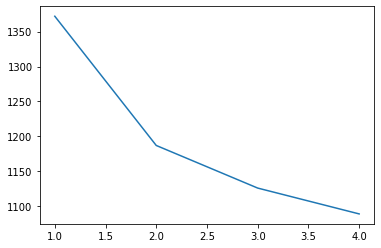

In [ ]:
data_cluster = data_final.iloc[:,1:20]
data_cluster['ST322_C'] = pd.cut(data_cluster['ST322'], [-1, 10, 20, 30, 40, 50, 100, 1000], 
                              labels=['0-10', '10-20', '20-30', '30-40','40-50','50-100','100-1000'])
data_cluster  = data_cluster.drop('ST322',axis = 1)

data_cluster['edad_C'] = pd.cut(data_cluster['edad'], [-1, 19, 20, 21, 22, 23, 24, 25, 100], 
                              labels=['19', '20', '21', '22','23','24','25', 'más de 25'])
data_cluster  = data_cluster.drop('edad',axis = 1)
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(data_cluster)
    cost.append(kmode.cost_)
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
le = preprocessing.LabelEncoder()
data_c = data_final.iloc[:,1:20].apply(le.fit_transform)
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data_cluster)
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data_c.iloc[:,0:20].columns

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14, cost: 1196.0
Run 1, iteration: 2/100, moves: 11, cost: 1187.0
Run 1, iteration: 3/100, moves: 0, cost: 1187.0


Los centroides son

In [ ]:
clusterCentroidsDf

,sexo,edad,Q96,Q98,ST322,ST328,ST3228,ST3234,ST3243,ST3244,ST3245,ST3256,ST3264,ST3265,ST3267,ST3268,ST3269,ST3270,ST3282
0,1.0,1.0,1.0,4.0,3.0,3.0,5.0,2.0,3.0,5.0,6.0,1.0,3.0,4.0,3.0,3.0,1.0,0-10,20
1,1.0,0.0,0.0,3.0,2.0,2.0,1.0,2.0,2.0,6.0,3.0,3.0,5.0,3.0,2.0,2.0,0.0,0-10,21


Vemos la clasificación por cluster

In [ ]:
data_cluster_f = data_cluster.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['Cluster']
combinedDf = pd.concat([data_cluster_f, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf

,sexo,Q96,Q98,ST328,ST3228,ST3234,ST3243,ST3244,ST3245,ST3256,ST3264,ST3265,ST3267,ST3268,ST3269,ST3270,ST3282,ST322_C,edad_C,Cluster
0,1.0,0.0,1.0,5.0,3.0,3.0,3.0,2.0,3.0,5.0,5.0,3.0,6.0,3.0,3.0,4.0,1.0,20-30,más de 25,0
1,1.0,1.0,0.0,3.0,3.0,2.0,4.0,2.0,3.0,5.0,6.0,3.0,6.0,4.0,3.0,3.0,1.0,30-40,25,0
2,1.0,1.0,1.0,4.0,2.0,2.0,6.0,2.0,2.0,7.0,4.0,3.0,4.0,1.0,3.0,4.0,1.0,50-100,25,0
3,1.0,1.0,0.0,4.0,3.0,3.0,5.0,2.0,3.0,8.0,6.0,5.0,6.0,4.0,3.0,4.0,1.0,30-40,24,0
4,1.0,1.0,1.0,5.0,3.0,3.0,5.0,2.0,3.0,6.0,2.0,6.0,4.0,3.0,3.0,4.0,1.0,50-100,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.0,0.0,1.0,3.0,3.0,2.0,5.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,0-10,22,1
133,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,6.0,3.0,1.0,3.0,3.0,2.0,3.0,1.0,30-40,22,0
134,1.0,1.0,1.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,1.0,5.0,2.0,3.0,0.0,1.0,20-30,22,0
135,1.0,1.0,0.0,3.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,2.0,6.0,2.0,2.0,1.0,0.0,10-20,22,1


### Gráficos por variable de los cluster 

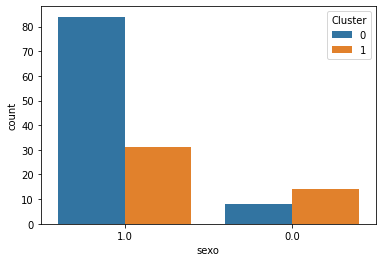

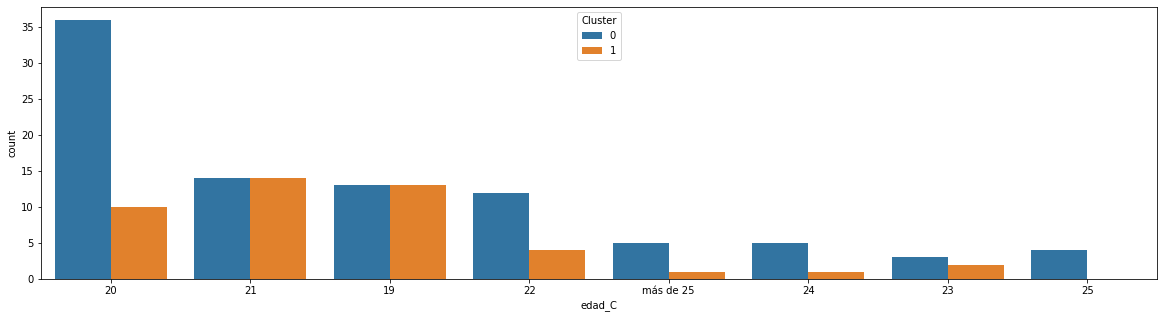

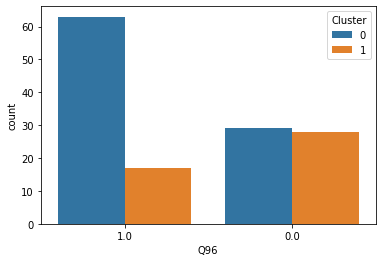

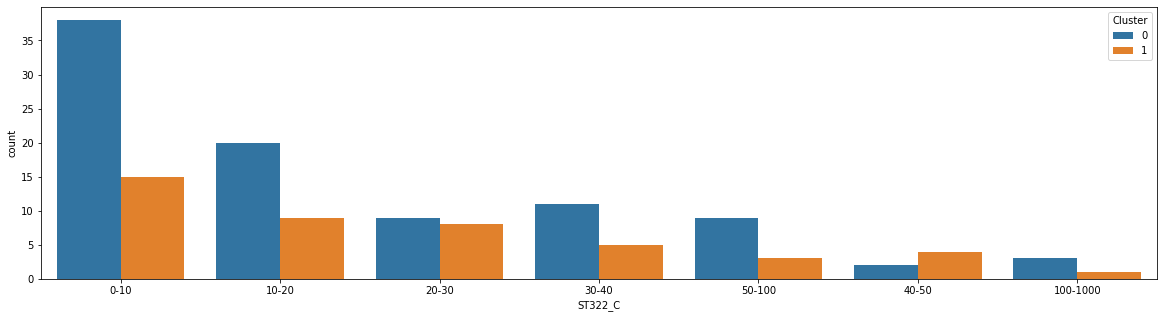

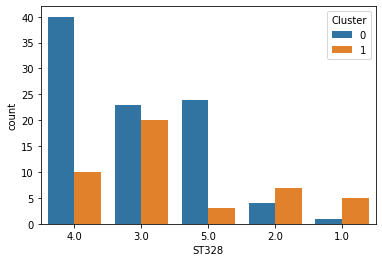

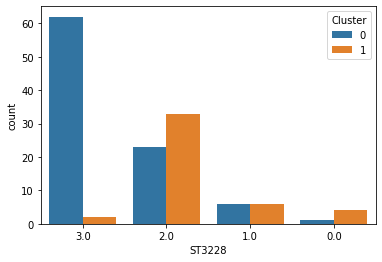

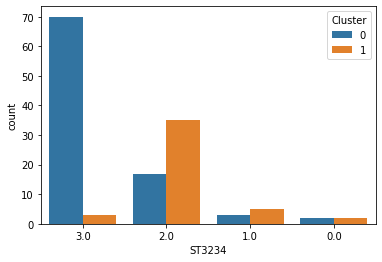

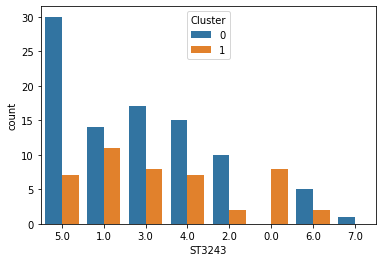

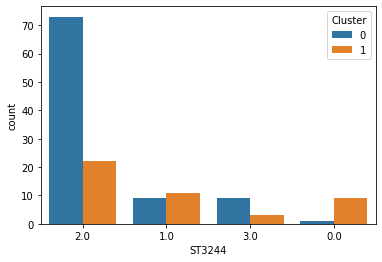

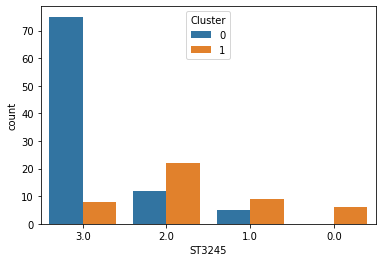

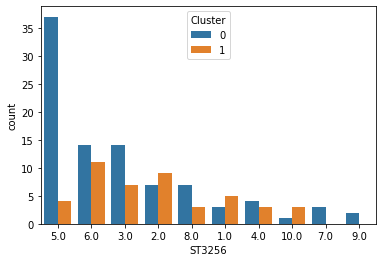

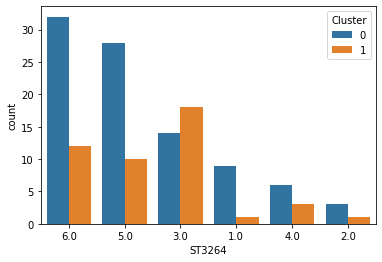

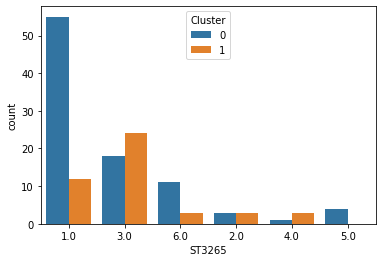

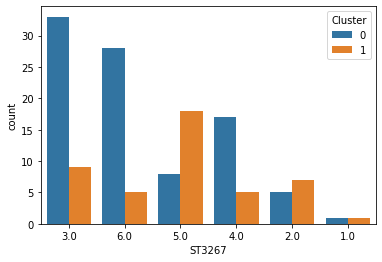

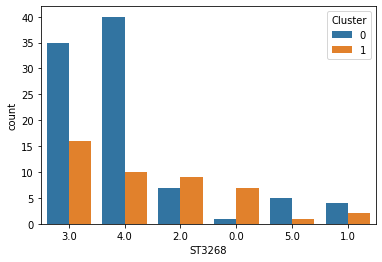

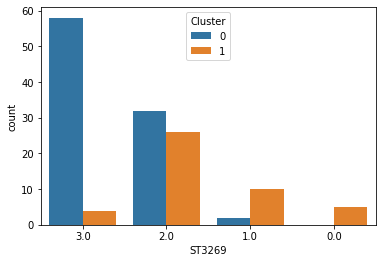

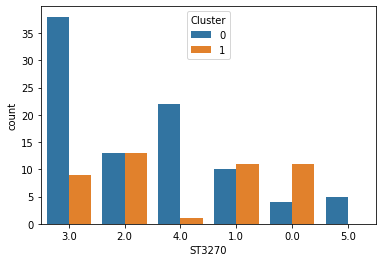

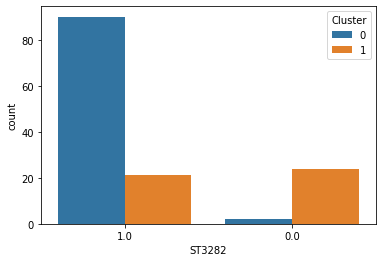

In [ ]:
cluster_0 = combinedDf[combinedDf['Cluster'] == 0]
cluster_1 = combinedDf[combinedDf['Cluster'] == 1]

sns.countplot(x=combinedDf['sexo'],order=combinedDf['sexo'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
plt.subplots(figsize = (20,5))
sns.countplot(x=combinedDf['edad_C'],order=combinedDf['edad_C'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['Q96'],order=combinedDf['Q96'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
plt.subplots(figsize = (20,5))
sns.countplot(x=combinedDf['ST322_C'],order=combinedDf['ST322_C'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST328'],order=combinedDf['ST328'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3228'],order=combinedDf['ST3228'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3234'],order=combinedDf['ST3234'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3243'],order=combinedDf['ST3243'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3244'],order=combinedDf['ST3244'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3245'],order=combinedDf['ST3245'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3256'],order=combinedDf['ST3256'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3264'],order=combinedDf['ST3264'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3265'],order=combinedDf['ST3265'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3267'],order=combinedDf['ST3267'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3268'],order=combinedDf['ST3268'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3269'],order=combinedDf['ST3269'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3270'],order=combinedDf['ST3270'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()
sns.countplot(x=combinedDf['ST3282'],order=combinedDf['ST3282'].value_counts().index,hue=combinedDf['Cluster'])
plt.show()

Como resultado final se obtuvieron dos cluster, es decir, dos grandes grupos de alumnos, comentaremos algunos hechos interesantes. 

***Sexo***
Se aprecia que las mujeres tienen más presencia en el cluster 0 y los hombres en el cluster 1, esto nos dice que hay diferencias en los sexos antes las respuestas de la encuesta, sin embargo en la regresión el sexo no es significativo antes la pregunta del proposito de vida.

**Otras preguntas**

En las otras variables se aprecia que un grupo de preguntas un cluster siempre predomina sobre el otro, pero en el otro grupo de cuantificar percepciones los dos cluster clasifican a las personas con puntos bajos y otro cluster con puntos altos, esto sumado al sexo nos deja identificado los dos tipos de alumnos encuestados y que preguntas son más importantes para estos grupos.


# Conclusión

A  lo  largo  del  proyecto  se  mostraron  los  principales  aspectos  del  estudio  realizado,  teniendo como objetivo explicar el cambio de propósito de vida de los estudiantes al pasar por esta experiencia de aprendizaje servicio.

Con el análisis descriptivo mediantes gráficos univariados, podemos observar las tendencias de las respuestas de los estudiantes, dado que se encuentran más concentradas en variables como sexo, sentimientos positivos hacia las interacciones, el rol y las tareas hacias la comunidad, la ayuda con la comunidad fue mutua, que su propósito de vida está relacionado al proyecto que realizaron en la actividad curricular, pese a que el mayor porcentaje de estudiantes declara no haber cambiado su propósito de vida como consecuencia de pasar por la experiencia de aprendizaje servicio.

Luego, al realizar el análisis de componentes principales se tomaron las preguntas con escala likert para encontrar un número de factores que explican aproximadamente lo mismo que las variables originales, así perder lo menos posible de información para explicar las variables en el modelo de regresión logística.

Como utilizamos la tercera encuesta, dejamos a analizar las variables que pueden ser significativas para el modelo de regresión logística. Al calcular las métricas del modelo, podemos mencionar que tiene un buen ajuste, lo que da paso a generar las interpretaciones correspondiente de los parámetros.

Por último, se calculó el algortimo k-modes para agrupar grandes conjuntos de datos categóricos, y obtener las k modas que representan al conjunto, generando dos grandes grupos de estudiantes.


